<a href="https://colab.research.google.com/github/jainam-shah1/Python_Projects/blob/main/Report_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommendation report
> By Jainam Shah 

##Objective

> Using this dataset i intend to get insights on how the distribution of movies has been since 1986 to 2016 interms of their screen time, budget, gross profit, ratings and so forth.

>Moreover, I aim to know which movies had the highest gross profit regardless of year, also know about total profit that is gross progit - budget.

> Does genre affect the rating or gross profit? we will find out that in this report. Also which stars and directors have been in the industry for the longest period of time by checking the number of movies made by them throughout the period.

##Data exploration

> Installing and importing necessary libraries

In [ ]:
!pip install squarify -qqq

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


>Read the datafile using the pandas library

In [ ]:
df = pd.read_csv("/content/movies.csv", index_col=False)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


> This datafile has 7668 rows and 15 columns

In [ ]:
df.shape

(7668, 15)

> Using the `.describe` function we can know the mean, median , interqartile range.

In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


> Using the `.isnull` I'll find the total null values and empty values in each column.


In [ ]:
df_null = pd.concat([df.isnull().sum(),df.eq('').sum()],keys=['Nulls','Empty'],axis=1)
df_null

,Nulls,Empty
name,0,0
rating,77,0
genre,0,0
year,0,0
released,2,0
score,3,0
votes,3,0
director,0,0
writer,3,0
star,1,0


> Since its difficult to estimate the budget and gross profit for rows that have null values, I'll will use the `.dropna` function to remove all the rows in budget and gross column that contains null values.

In [ ]:
df = df.dropna(subset=['budget','gross'], how='all')
df.dropna(inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


> recheck the columns if they contain any NA values.

In [ ]:
df_null = pd.concat([df.isnull().sum(),df.eq('').sum()],keys=['Nulls','Empty'],axis=1)
df_null

,Nulls,Empty
name,0,0
rating,0,0
genre,0,0
year,0,0
released,0,0
score,0,0
votes,0,0
director,0,0
writer,0,0
star,0,0


In [ ]:
df.info

<bound method DataFrame.info of                                                 name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                     

##Subsets of Data

###1 Using the `.groupby` function I'll groupby name and company column and to give a new dataframe in descending order of sum of budget and gross profit.

In [ ]:
comp = df.groupby(['name','company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
comp.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,budget,gross
name,company,,
Avatar,Twentieth Century Fox,237000000.0,2847246203.0
Avengers: Endgame,Marvel Studios,356000000.0,2797501328.0
The Lion King,Walt Disney Pictures,305000000.0,2754448457.0
Titanic,Twentieth Century Fox,200000000.0,2201647264.0
Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000.0,2069521700.0
Avengers: Infinity War,Marvel Studios,321000000.0,2048359754.0
Jurassic World,Universal Pictures,150000000.0,1670516444.0
Aladdin,Walt Disney Pictures,211000000.0,1554744172.0
The Avengers,Marvel Studios,220000000.0,1518815515.0


> Above output shows Avatar	movie has had the highest budget 237000000.0	and also made highest gross profit of 2847246203.0

###2 Subset 2 contains name, comapny, genre and year in ascending order of year to depict which was the oldest movie made by which comapany.

In [ ]:
oldest = df.sort_values("year", ascending = True)
oldest[['name', "company", "genre", "year"]][:10]

,name,company,genre,year
0,The Shining,Warner Bros.,Drama,1980
28,Brubaker,Twentieth Century Fox,Crime,1980
29,American Gigolo,Paramount Pictures,Crime,1980
33,Cattle Annie and Little Britches,Cattle Annie Productions,Drama,1980
35,Private Benjamin,Warner Bros.,Comedy,1980
36,The Hollywood Knights,PolyGram Filmed Entertainment,Comedy,1980
37,Motel Hell,Camp Hill,Comedy,1980
42,The Stunt Man,Melvin Simon Productions,Action,1980
46,The Island,Universal Pictures,Action,1980
48,The Nude Bomb,Universal Pictures,Action,1980


> Hence it states that The Shining movie by	Warner Bros in 1980 was the oldest movie in the dataset.

###3 In this subset we will find the exact opposite of previous subset which is the latest movie using the same columns but year in descending order.

In [ ]:
newest = df.sort_values("year", ascending = False)
newest[['name', "company", "genre", "year"]][:10]

,name,company,genre,year
7652,The Eight Hundred,Beijing Diqi Yinxiang Entertainment,Action,2020
7651,The Call of the Wild,20th Century Studios,Adventure,2020
7650,Dolittle,Universal Pictures,Adventure,2020
7649,Sonic the Hedgehog,Paramount Pictures,Action,2020
7648,Bad Boys for Life,Columbia Pictures,Action,2020
7646,The Invisible Man,Universal Pictures,Drama,2020
7645,Birds of Prey,Clubhouse Pictures (II),Action,2020
7643,Tenet,Warner Bros.,Action,2020
7481,Aladdin,Walt Disney Pictures,Adventure,2019
7488,Toy Story 4,Pixar Animation Studios,Animation,2019


> The above output depicts that The Eight Hundred	by Beijing Diqi Yinxiang Entertainment	was the latest movie which had a Action genre.

###4 Using the `.groupby` function we will group company by its value counts to depict which company had the highest number of movies.

In [ ]:
df.groupby('company').size()
company = df["company"].value_counts()
company.head(10)

Universal Pictures           330
Columbia Pictures            302
Warner Bros.                 298
Paramount Pictures           279
Twentieth Century Fox        209
New Line Cinema              155
Walt Disney Pictures         107
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     99
Dreamworks Pictures           75
Name: company, dtype: int64

> According to the report Universal Pictures has the highest number of movies of 330.


###5 Using `.groupby` on country column we will know which country had the highest budget and gross profit.

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
bgcountry=df.groupby(['country'])['budget','gross'].sum().sort_values(by=['gross'],ascending=False)
bgcountry

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,budget,gross
country,,
United States,161460055145.0,470794726099.0
United Kingdom,16432023780.0,45351705966.0
France,3304500000.0,6568533115.0
China,1846400000.0,6305918953.0
New Zealand,1120100000.0,6278354563.0
Canada,2542177000.0,5734558085.0
Germany,3344750000.0,5688083409.0
Australia,1080950000.0,2800304264.0
Japan,638100000.0,2494214085.0


> According to the output United States	had a movie budget of 161460055145.0	and made a gross profit of 470794726099.0

###6 Lets create a new column called total profit that is gross prifit - budget to know which movie had the highest profit and in which genre.

In [ ]:
df['total_profit'] = df['gross'] - df['budget']
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,total_profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


In [ ]:
max_profit = df.sort_values("total_profit", ascending = False)
max_profit[['name', "company", "genre", "total_profit"]][:10]

,name,company,genre,total_profit
5445,Avatar,Twentieth Century Fox,Action,2610246203.0
7445,Avengers: Endgame,Marvel Studios,Action,2441501328.0
3045,Titanic,Twentieth Century Fox,Drama,2001647264.0
6663,Star Wars: Episode VII - The Force Awakens,Lucasfilm,Action,1824521700.0
7244,Avengers: Infinity War,Marvel Studios,Action,1727359754.0
6653,Jurassic World,Universal Pictures,Action,1520516444.0
7480,The Lion King,Walt Disney Pictures,Animation,1410727580.0
6646,Furious 7,Universal Pictures,Action,1325341399.0
7494,Frozen II,Walt Disney Animation Studios,Animation,1300026933.0
6043,The Avengers,Marvel Studios,Action,1298815515.0


> With no dobut Avatar takes takes the lead with 2.6 billion profit and the genre was action.

##Visualization

> This bar plot depicts which the trend in the number of movies in each country.
And as you can see United states has the number of movies released.

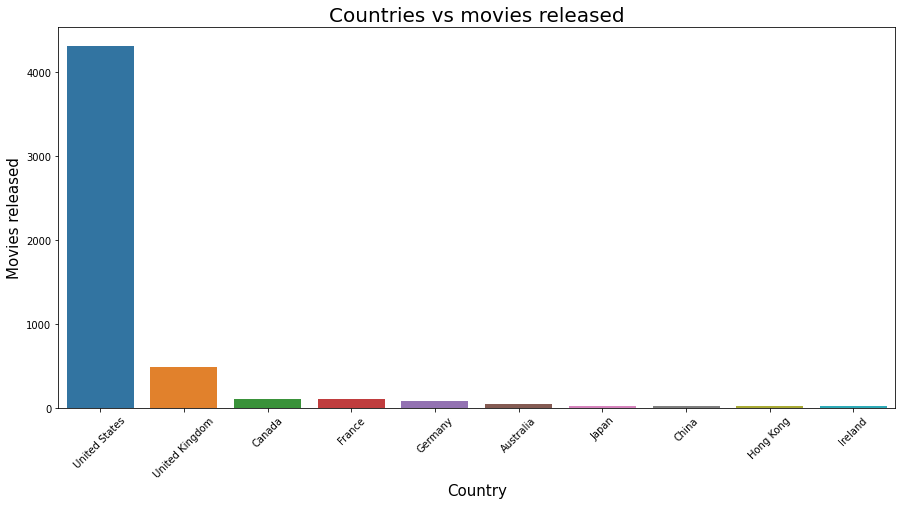

In [ ]:
Countries = pd.DataFrame(df['country'].value_counts())
Ten_countries = pd.DataFrame(df['country'].value_counts()).head(10)

sns.barplot(x = Ten_countries.index, y = Ten_countries['country'])

labels =Ten_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

> I'll use the pairplot graph to see the correlation between all the integer value columns.

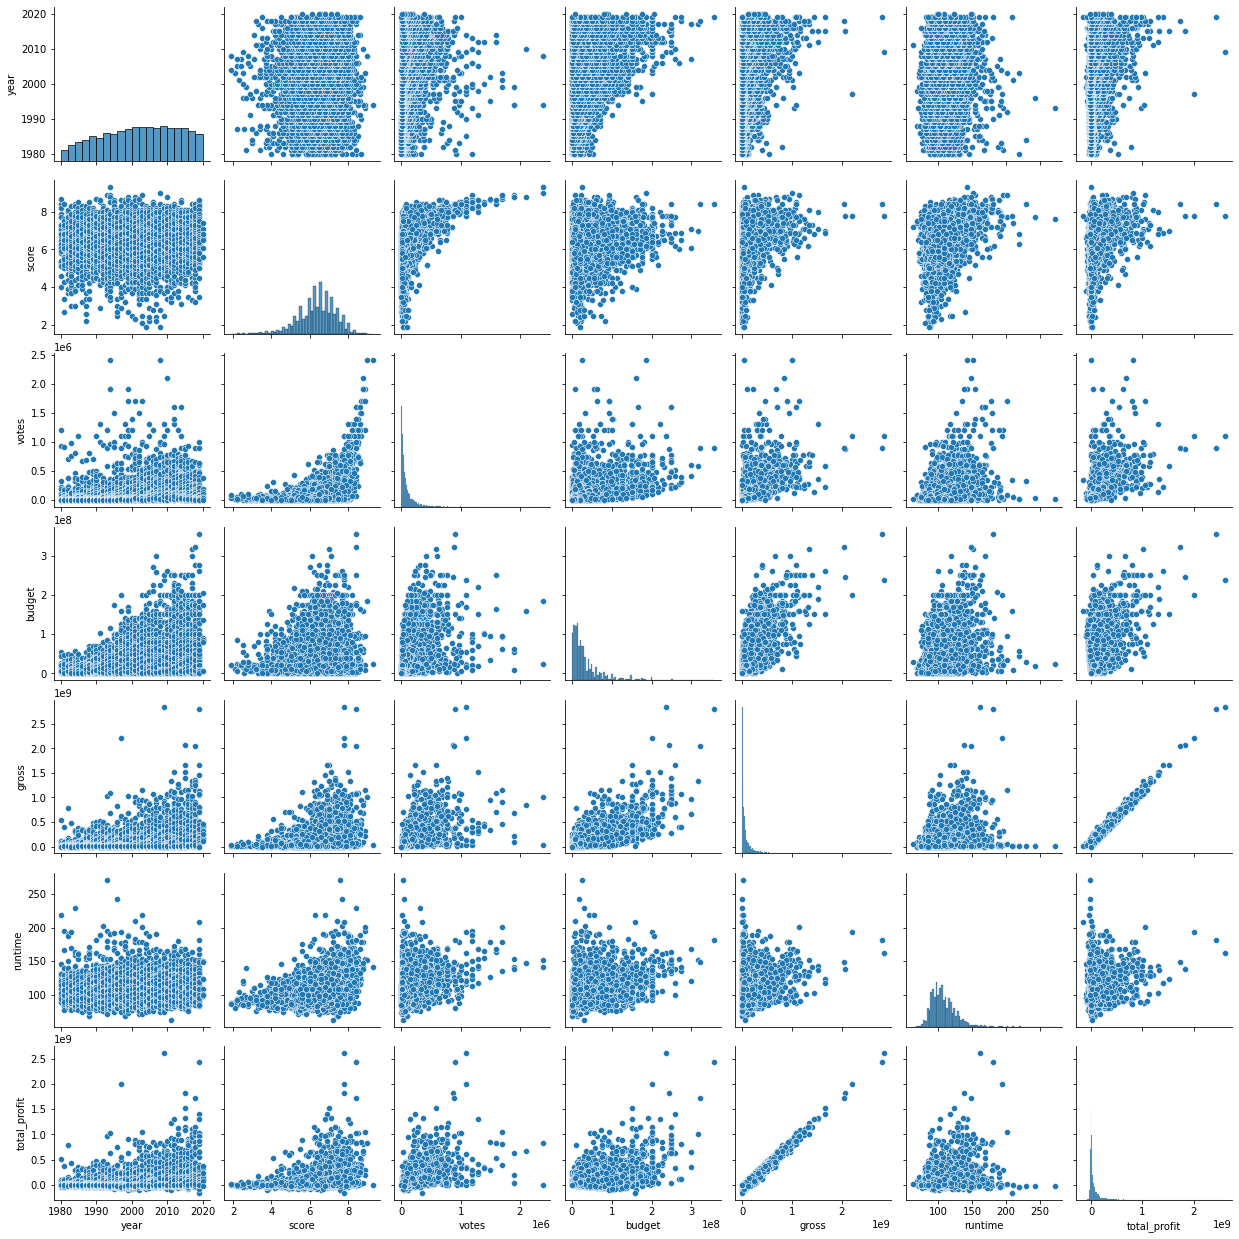

In [ ]:
sns.pairplot(df,diag_kind='hist')


> Using the `wordcloud` lets conclude which actor had the highest screen on time in the time period.

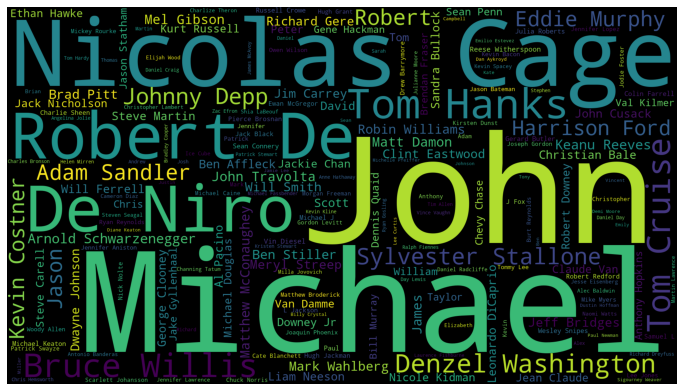

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.star))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> According to the plot it is very clear that John, Michael and Nicolas cage had the highest screen on time meaning more number of movies than the rest.

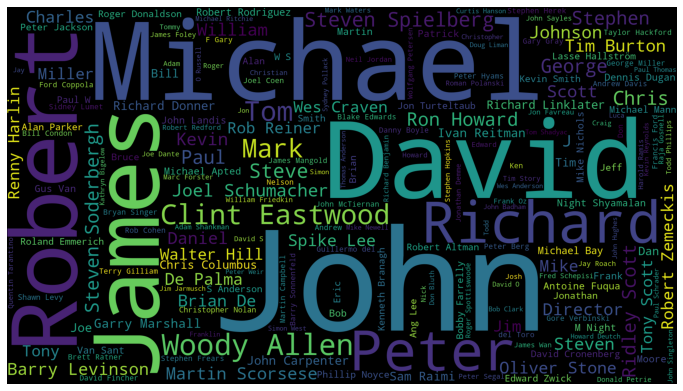

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> From the above plot we can denote that Michael, David and John made the highest number of movies.

> We'll use a piechart to see the distribution of movies in the span of year.

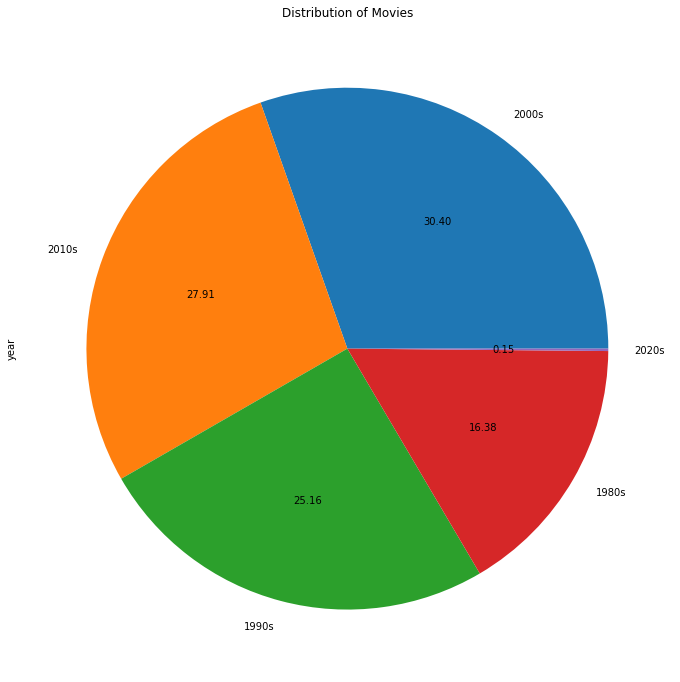

In [ ]:
movie_count_in_10th_year = df["year"].dropna().apply(lambda x:str(int(x)//10*10)+'s').value_counts()  
movie_count_in_10th_year.plot.pie(title='Distribution of Movies', autopct="%.2f", figsize = (15,12))


> According to the plot 30.40% of the movies were released in 2000 followed by 2010 with 27.91%.

##Summary

> After analysing the datset there are many intersting finding we made.
- To begin with the average runtime of movie was 107.26 minutes and the highest runtime of movie was 366 minutes.
- **Avatar** by Twentieth Century Fox	had the highest budget for making the film with *237 million* and also made the highest profit of *2.8 billion*
- According to the report the oldest movie was **The Shining** by Warner Bros in *1980* and the latest movies was **The Eight Hundred**	by Beijing Diqi Yinxiang Entertainment in *2020*
- **Universal Pictures** released highest number of movies with *330* followed by **Columbia Pictures** with *302* and in third place was **Warner Bros** with *298*
- **Unites States** had the highest total budget for making films and also ended up making highest profit. Whereas **India** currently stands at *22* rank.
- The top 3 star that had the highest screen on time were none other than **John, Michael** and **Nicolas cage**.
- And the top 3 director to make the movie during that time span were **Michael, David** and **John**.


In [ ]:
df = df[df['director'].str.contains('Steven Spielberg')]
print(df)

                                                   name rating      genre  \
92        Indiana Jones and the Raiders of the Lost Ark     PG     Action   
209                          E.T. the Extra-Terrestrial     PG     Family   
481                Indiana Jones and the Temple of Doom     PG     Action   
661                                    The Color Purple  PG-13      Drama   
1059                                  Empire of the Sun     PG     Action   
1443                 Indiana Jones and the Last Crusade  PG-13     Action   
1492                                             Always     PG      Drama   
1846                                               Hook     PG  Adventure   
2245                                      Jurassic Park  PG-13     Action   
2247                                   Schindler's List      R  Biography   
3064                      The Lost World: Jurassic Park  PG-13     Action   
3106                                            Amistad      R  Biography   

##Recommendations

> My recommendation to Steven Spielberg is that by observing the trend he should make more action or animated movie as they have had the highest Net profit.

> If he is able to get more producers to increase the budget of his movies, he is more likely to make net profit.

> He should also collaborate more with Universal pictures, Columbia Pictures and Warner Bros as they have had the highest success rate.